In [1]:
!pip install langchain langchain_community langsmith langchain_groq

In [2]:
from typing import Annotated
from typing_extensions import TypedDict

In [ ]:
!pip install arxiv
!pip install wikipedia

In [9]:
## Working with  tools



from langchain_community.utilities import ArxivAPIWrapper , WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun , WikipediaQueryRun

## Arxiv and Wikipedia tools

arxiv_wrapper =  ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=300)
arxiv_tool = ArxivQueryRun(arxiv_wrapper=arxiv_wrapper)


In [10]:
arxiv_tool

ArxivQueryRun()

In [18]:
wikipedia_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max =300)
wiki_tool = WikipediaQueryRun(api_wrapper=wikipedia_wrapper) # The parameter name has been corrected.

In [19]:
wiki_tool

WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from '/usr/local/lib/python3.10/dist-packages/wikipedia/__init__.py'>, top_k_results=1, lang='en', load_all_available_meta=False, doc_content_chars_max=300))

In [21]:
wiki_tool.invoke("Who is the current president of the United States?")

'Page: List of actors who have played the president of the United States\nSummary: This is a list of actors who have played the role of a real or fictitious president of the United States.'

In [22]:
arxiv_tool.invoke("attention all you need")

'Published: 2024-07-22\nTitle: Attention Is All You Need But You Don\'t Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time on the performance of\nLlama-v2 models. We find that dropping dreeper attention layers only marginally\ndecreases performance but leads to the best speedups alongside dropping entire\nlayers. For example, removing 33\\% of attention layers in a 13B Llama2 model\nresults in a 1.8\\% drop in average performance over the OpenLLM benchmark. We\nalso observe that skipping layers except the latter layers reduces performances\nfor more layers skipped, except for skipping the attention layers.\n\

In [25]:
tools = [wiki_tool]

In [ ]:
!pip install langgraph

In [32]:
# langgraph Application

from langgraph.graph.message import add_messages

class State(TypedDict) :
   messages : Annotated[list , add_messages]

In [33]:
from langgraph.graph import StateGraph , START , END

In [34]:
graphbuilder =  StateGraph(State)



In [35]:
from  langchain_groq import ChatGroq


In [38]:
from google.colab import userdata
groq = userdata.get("groq_api")

In [40]:
llm =  ChatGroq(groq_api_key = groq , model= "gemma-7b-it" )

In [41]:
llm.invoke("who is the current predent of USA")

AIMessage(content='As of today, **Joe Biden** is the current President of the United States.', response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 17, 'total_tokens': 35, 'completion_time': 0.019137565, 'prompt_time': 0.011061086, 'queue_time': 0.003332304000000001, 'total_time': 0.030198651}, 'model_name': 'gemma-7b-it', 'system_fingerprint': 'fp_7d8efeb0b1', 'finish_reason': 'stop', 'logprobs': None}, id='run-cae82882-864e-46de-9356-bee3ba7f5a09-0', usage_metadata={'input_tokens': 17, 'output_tokens': 18, 'total_tokens': 35})

In [53]:
llm.bind(tools=tools)

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7f03d3c27fd0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7f03d3c2f730>, model_name='gemma-7b-it', groq_api_key=SecretStr('**********')), kwargs={'tools': [WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from '/usr/local/lib/python3.10/dist-packages/wikipedia/__init__.py'>, top_k_results=1, lang='en', load_all_available_meta=False, doc_content_chars_max=300))]})

In [56]:
def chatbot(state:State) :
  return {"messages" : [llm.invoke(state["messages"])]}

In [ ]:
graphbuilder.add_node("chatbot" , chatbot)


In [60]:
graphbuilder.add_edge(START , "chatbot")


In [ ]:
!pip install --upgrade langgraph

In [68]:
from langgraph.prebuilt import ToolNode,tools_condition

In [ ]:
tool_node =  ToolNode(tools=tools)
graphbuilder.add_node("tool_node" , tool_node)


In [72]:
graphbuilder.add_conditional_edges("chatbot" ,
                                   tools_condition)

In [73]:
graphbuilder.add_edge("tool_node" , "chatbot")
graphbuilder.add_edge("chatbot" , END)

In [74]:
graphbuilder

In [75]:
graph = graphbuilder.compile()

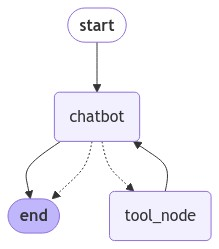

In [76]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [77]:
user_input = "Hi there  , my name is fahim"

In [79]:
events = graph.stream(

        {'messages' : [("user" , user_input)]} , stream_mode = "values"

)

In [85]:
for event in events  :
  event["messages"][-1].pretty_print()

In [86]:
for event in events  :
  event["messages"][-1].pretty_print()

In [87]:
user_input="tell me about llm model "

events=graph.stream(
     {"messages": [("user", user_input)]},stream_mode="values"
)

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

tell me about llm model 
================================== Ai Message ==================================

**LLM (Large Language Model)**

LLM (Large Language Model) is a type of statistical language model that can generate human-quality text, translate languages, summarize documents, and answer open-ended questions. These models are trained on massive datasets of text and code, allowing them to learn the patterns and relationships between words and concepts.

**Architecture:**

LLM models are based on Transformer neural networks, which rely on attention mechanisms to capture the relationships between words in a sentence. The model learns to predict the next word in a sequence given the preceding words.

**Key Features:**

- **Generative:** LLMs can generate new text, stories, and code.
- **Translational:** They can translate languages with high accuracy.
- **Summarizing:** LLMs can summarize long documen